# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [66]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        inner_list=[city,lat_lng[0], lat_lng[1]]
        cities.append(inner_list)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 1500


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# lat=57.59530005036689
# lon=-133.98126358912216
# API_key="36e2c795976539573f2f13df8bbe2061"
# url=f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_key}"
# url
# # Run request
# response = requests.get(url).json()
# #response
# # Print the json (pretty printed)
# print(json.dumps(response, indent=4, sort_keys=True))

In [7]:
# # Read the API key from the config file
# # config = configparser.ConfigParser()
# # config.read('config.ini')
# # API_key = config['weather_api_key']
# # API_key="36e2c795976539573f2f13df8bbe2061"
# url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API_key}"
# #url=f"https://api.openweathermap.org/data/2.5/weather?lat={cities["lat"]}&lon={cities["lon"]}&appid={API_key}"
# url
# # Run request
# response = requests.get(url).json()
# #response
# # Print the json (pretty printed)
# print(json.dumps(response, indent=4, sort_keys=True))

In [6]:
# Set the API base URL
API_key = weather_api_key
#url = "https://api.openweathermap.org/data/2.5/weather?lat={}&lon={}&appid={}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
# print(f" recordnumber -> {i},city-> {city[0],city[1],city[2]}")
#print(city_data)
#     # Create endpoint URL with each city
    city_url =f"https://api.openweathermap.org/data/2.5/weather?lat={city[1]}&lon={city[2]}&appid={API_key}"
      # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city[0]))
     
#     # Add 1 to the record count
    record_count += 1
# Run request
#        response = requests.get(url).json()
#     # Run an API request for each of the cities
    try:  
#             if i==50:
        response = requests.get(city_url).json()
        #print(json.dumps(response, indent=4, sort_keys=True))
        #         # Parse the JSON and retrieve data
        city_weather = city[0]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response["coord"]["lat"]
        #print(f" city lat : {city_lat}")

        city_lng = response["coord"]["lon"]
        #print(f" city long : {city_lng}")

        city_max_temp = response["main"]["temp_max"]
        #print(f" Max tempreture : {city_max_temp}")

        city_humidity = response["main"]["humidity"]
        #print(f" humidity : {city_humidity}")

        city_clouds = response["clouds"]["all"]
        #print(f"Clouds: {city_clouds}")

        city_wind = response["wind"]["speed"]
        #print(f" wind : {city_wind}")

        city_country = response["sys"]["country"]
        #print(f" Country : {city_country}")

        city_date = response["dt"]
        #print(f"Date: {city_date}")

        #         # Append the City information into city_data list
        city_data.append({"City": city_weather, 
                  "Lat": city_lat, 
                  "Lng": city_lng, 
                  "Max Temp": city_max_temp,
                  "Humidity": city_humidity,
                  "Cloudiness": city_clouds,
                  "Wind Speed": city_wind,
                  "Country": city_country,
                  "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    # Indicate that Data Loading is complete 
print("-----------------------------")
print(city_data)
# print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | horta
City not found. Skipping...
Processing Record 2 of Set 1 | hithadhoo
City not found. Skipping...
Processing Record 3 of Set 1 | papatowai
Processing Record 4 of Set 1 | amnat charoen
Processing Record 5 of Set 1 | puerto ayora
City not found. Skipping...
Processing Record 6 of Set 1 | olonkinbyen
City not found. Skipping...
Processing Record 7 of Set 1 | waitangi
City not found. Skipping...
Processing Record 8 of Set 1 | mehran
Processing Record 9 of Set 1 | enewetak
City not found. Skipping...
Processing Record 10 of Set 1 | tiksi
City not found. Skipping...
Processing Record 11 of Set 1 | taiohae
City not found. Skipping...
Processing Record 12 of Set 1 | papatowai
City not found. Skipping...
Processing Record 13 of Set 1 | san vicente de canete
City not found. Skipping...
Processing Record 14 of Set 1 | avarua
City not found. Skipping...
Processing Record 15 of Set 1 | bosobolo
Processin

Processing Record 29 of Set 3 | adamstown
City not found. Skipping...
Processing Record 30 of Set 3 | waitangi
City not found. Skipping...
Processing Record 31 of Set 3 | 'ohonua
City not found. Skipping...
Processing Record 32 of Set 3 | invercargill
City not found. Skipping...
Processing Record 33 of Set 3 | port elizabeth
City not found. Skipping...
Processing Record 34 of Set 3 | blackmans bay
City not found. Skipping...
Processing Record 35 of Set 3 | thompson
City not found. Skipping...
Processing Record 36 of Set 3 | adamstown
City not found. Skipping...
Processing Record 37 of Set 3 | blackmans bay
City not found. Skipping...
Processing Record 38 of Set 3 | wailua homesteads
City not found. Skipping...
Processing Record 39 of Set 3 | kapa'a
City not found. Skipping...
Processing Record 40 of Set 3 | saudarkrokur
City not found. Skipping...
Processing Record 41 of Set 3 | manggar
City not found. Skipping...
Processing Record 42 of Set 3 | avarua
City not found. Skipping...
Proce

Processing Record 13 of Set 6 | avallon
Processing Record 14 of Set 6 | mizdah
Processing Record 15 of Set 6 | port elizabeth
City not found. Skipping...
Processing Record 16 of Set 6 | kapa'a
City not found. Skipping...
Processing Record 17 of Set 6 | priargunsk
Processing Record 18 of Set 6 | prince rupert
Processing Record 19 of Set 6 | adamstown
City not found. Skipping...
Processing Record 20 of Set 6 | enewetak
City not found. Skipping...
Processing Record 21 of Set 6 | kodiak
City not found. Skipping...
Processing Record 22 of Set 6 | aasiaat
City not found. Skipping...
Processing Record 23 of Set 6 | haiku-pauwela
City not found. Skipping...
Processing Record 24 of Set 6 | fort bragg
City not found. Skipping...
Processing Record 25 of Set 6 | raja
Processing Record 26 of Set 6 | port-aux-francais
City not found. Skipping...
Processing Record 27 of Set 6 | bhadra
Processing Record 28 of Set 6 | georgetown
City not found. Skipping...
Processing Record 29 of Set 6 | susuman
City n

Processing Record 45 of Set 8 | okha
City not found. Skipping...
Processing Record 46 of Set 8 | peace river
Processing Record 47 of Set 8 | haiku-pauwela
City not found. Skipping...
Processing Record 48 of Set 8 | waitangi
City not found. Skipping...
Processing Record 49 of Set 8 | novyy urengoy
Processing Record 0 of Set 9 | avarua
City not found. Skipping...
Processing Record 1 of Set 9 | khandyga
Processing Record 2 of Set 9 | bredasdorp
City not found. Skipping...
Processing Record 3 of Set 9 | bredasdorp
City not found. Skipping...
Processing Record 4 of Set 9 | minas de marcona
City not found. Skipping...
Processing Record 5 of Set 9 | papatowai
City not found. Skipping...
Processing Record 6 of Set 9 | puerto baquerizo moreno
Processing Record 7 of Set 9 | ilha de mocambique
City not found. Skipping...
Processing Record 8 of Set 9 | blackmans bay
City not found. Skipping...
Processing Record 9 of Set 9 | uturoa
City not found. Skipping...
Processing Record 10 of Set 9 | rio gra

City not found. Skipping...
Processing Record 29 of Set 11 | la ronge
Processing Record 30 of Set 11 | port-aux-francais
City not found. Skipping...
Processing Record 31 of Set 11 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 32 of Set 11 | port-aux-francais
City not found. Skipping...
Processing Record 33 of Set 11 | wakkanai
Processing Record 34 of Set 11 | vorkuta
City not found. Skipping...
Processing Record 35 of Set 11 | iqaluit
Processing Record 36 of Set 11 | kurchatov
Processing Record 37 of Set 11 | fisterra
Processing Record 38 of Set 11 | mar del plata
Processing Record 39 of Set 11 | mineiros
Processing Record 40 of Set 11 | waitangi
City not found. Skipping...
Processing Record 41 of Set 11 | san luis de la loma
City not found. Skipping...
Processing Record 42 of Set 11 | haiku-pauwela
City not found. Skipping...
Processing Record 43 of Set 11 | atafu village
City not found. Skipping...
Processing Record 44 of Set 11 | antsiranana
City not fo

City not found. Skipping...
Processing Record 7 of Set 14 | college
City not found. Skipping...
Processing Record 8 of Set 14 | adamstown
City not found. Skipping...
Processing Record 9 of Set 14 | olonkinbyen
City not found. Skipping...
Processing Record 10 of Set 14 | waitangi
City not found. Skipping...
Processing Record 11 of Set 14 | adamstown
City not found. Skipping...
Processing Record 12 of Set 14 | iqaluit
Processing Record 13 of Set 14 | udachny
City not found. Skipping...
Processing Record 14 of Set 14 | port-aux-francais
City not found. Skipping...
Processing Record 15 of Set 14 | hamilton
City not found. Skipping...
Processing Record 16 of Set 14 | ribeira grande
City not found. Skipping...
Processing Record 17 of Set 14 | i-n-salah
City not found. Skipping...
Processing Record 18 of Set 14 | siwa oasis
Processing Record 19 of Set 14 | guerrero negro
City not found. Skipping...
Processing Record 20 of Set 14 | labrador city
Processing Record 21 of Set 14 | invercargill
Ci

City not found. Skipping...
Processing Record 34 of Set 16 | amungan
City not found. Skipping...
Processing Record 35 of Set 16 | oualidia
Processing Record 36 of Set 16 | okha
City not found. Skipping...
Processing Record 37 of Set 16 | polyarnyy
City not found. Skipping...
Processing Record 38 of Set 16 | margaret river
City not found. Skipping...
Processing Record 39 of Set 16 | waitangi
City not found. Skipping...
Processing Record 40 of Set 16 | susuman
Processing Record 41 of Set 16 | ushuaia
City not found. Skipping...
Processing Record 42 of Set 16 | port-aux-francais
City not found. Skipping...
Processing Record 43 of Set 16 | puerto natales
City not found. Skipping...
Processing Record 44 of Set 16 | olonkinbyen
City not found. Skipping...
Processing Record 45 of Set 16 | jamestown
City not found. Skipping...
Processing Record 46 of Set 16 | manali
Processing Record 47 of Set 16 | itupiranga
Processing Record 48 of Set 16 | korsholm
Processing Record 49 of Set 16 | kollam
Cit

Processing Record 11 of Set 19 | sao joao da barra
City not found. Skipping...
Processing Record 12 of Set 19 | yanchep
Processing Record 13 of Set 19 | bilibino
City not found. Skipping...
Processing Record 14 of Set 19 | port-aux-francais
City not found. Skipping...
Processing Record 15 of Set 19 | keflavik
City not found. Skipping...
Processing Record 16 of Set 19 | minab
Processing Record 17 of Set 19 | edgewater
Processing Record 18 of Set 19 | wailua homesteads
City not found. Skipping...
Processing Record 19 of Set 19 | port-aux-francais
City not found. Skipping...
Processing Record 20 of Set 19 | adamstown
City not found. Skipping...
Processing Record 21 of Set 19 | brisas de zicatela
City not found. Skipping...
Processing Record 22 of Set 19 | nouadhibou
City not found. Skipping...
Processing Record 23 of Set 19 | grytviken
City not found. Skipping...
Processing Record 24 of Set 19 | ribeira grande
City not found. Skipping...
Processing Record 25 of Set 19 | assab
Processing R

Processing Record 40 of Set 21 | tura
City not found. Skipping...
Processing Record 41 of Set 21 | newman
Processing Record 42 of Set 21 | turgenevo
Processing Record 43 of Set 21 | fuvahmulah
City not found. Skipping...
Processing Record 44 of Set 21 | port-aux-francais
City not found. Skipping...
Processing Record 45 of Set 21 | puerto natales
City not found. Skipping...
Processing Record 46 of Set 21 | manokwari
City not found. Skipping...
Processing Record 47 of Set 21 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 48 of Set 21 | cidreira
City not found. Skipping...
Processing Record 49 of Set 21 | saipan
City not found. Skipping...
Processing Record 0 of Set 22 | port-aux-francais
City not found. Skipping...
Processing Record 1 of Set 22 | puerto natales
City not found. Skipping...
Processing Record 2 of Set 22 | port mathurin
City not found. Skipping...
Processing Record 3 of Set 22 | saipan
City not found. Skipping...
Processing Record 4 of Set 22 | 

City not found. Skipping...
Processing Record 19 of Set 24 | aasiaat
City not found. Skipping...
Processing Record 20 of Set 24 | tulun
Processing Record 21 of Set 24 | port-aux-francais
City not found. Skipping...
Processing Record 22 of Set 24 | port alfred
City not found. Skipping...
Processing Record 23 of Set 24 | puerto natales
City not found. Skipping...
Processing Record 24 of Set 24 | enewetak
City not found. Skipping...
Processing Record 25 of Set 24 | ilulissat
City not found. Skipping...
Processing Record 26 of Set 24 | yuzhno-kurilsk
City not found. Skipping...
Processing Record 27 of Set 24 | constantia
City not found. Skipping...
Processing Record 28 of Set 24 | gadzhiyevo
City not found. Skipping...
Processing Record 29 of Set 24 | waitangi
City not found. Skipping...
Processing Record 30 of Set 24 | toga village
City not found. Skipping...
Processing Record 31 of Set 24 | hermanus
City not found. Skipping...
Processing Record 32 of Set 24 | grytviken
City not found. Sk

City not found. Skipping...
Processing Record 48 of Set 26 | adamstown
City not found. Skipping...
Processing Record 49 of Set 26 | vilyuysk
City not found. Skipping...
Processing Record 0 of Set 27 | nizhneudinsk
Processing Record 1 of Set 27 | port-aux-francais
City not found. Skipping...
Processing Record 2 of Set 27 | sanctuary point
City not found. Skipping...
Processing Record 3 of Set 27 | port mathurin
City not found. Skipping...
Processing Record 4 of Set 27 | puerto natales
City not found. Skipping...
Processing Record 5 of Set 27 | lorengau
Processing Record 6 of Set 27 | grytviken
City not found. Skipping...
Processing Record 7 of Set 27 | lompoc
City not found. Skipping...
Processing Record 8 of Set 27 | west island
City not found. Skipping...
Processing Record 9 of Set 27 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 10 of Set 27 | grytviken
City not found. Skipping...
Processing Record 11 of Set 27 | vkhodnoy
Processing Record 12 of Set 27 |

City not found. Skipping...
Processing Record 21 of Set 29 | inhambane
City not found. Skipping...
Processing Record 22 of Set 29 | adamstown
City not found. Skipping...
Processing Record 23 of Set 29 | puerto natales
City not found. Skipping...
Processing Record 24 of Set 29 | taiohae
City not found. Skipping...
Processing Record 25 of Set 29 | remire-montjoly
City not found. Skipping...
Processing Record 26 of Set 29 | erdenet
Processing Record 27 of Set 29 | sunrise manor
Processing Record 28 of Set 29 | bonthe
City not found. Skipping...
Processing Record 29 of Set 29 | pisco
City not found. Skipping...
Processing Record 30 of Set 29 | novodvinsk
City not found. Skipping...
Processing Record 31 of Set 29 | aoulef
Processing Record 32 of Set 29 | hawaiian paradise park
City not found. Skipping...
Processing Record 33 of Set 29 | iskateley
City not found. Skipping...
Processing Record 34 of Set 29 | irbit
Processing Record 35 of Set 29 | mount isa
Processing Record 36 of Set 29 | her

In [7]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame.from_records(city_data)


# Show Record Count
city_data_df.count()

City          418
Lat           418
Lng           418
Max Temp      418
Humidity      418
Cloudiness    418
Wind Speed    418
Country       418
Date          418
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-76.7561,171.7199,267.44,75,100,5.54,AQ,1700705673
1,amnat charoen,15.8217,104.7667,299.22,68,100,5.52,TH,1700705675
2,mehran,33.2700,46.3847,280.06,31,100,0.53,IR,1700705682
3,bosobolo,4.1392,19.9461,294.83,99,100,1.08,CD,1700705694
4,seka,18.0471,103.8551,297.42,65,83,2.24,TH,1700705695


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-76.7561,171.7199,267.44,75,100,5.54,AQ,1700705673
1,amnat charoen,15.8217,104.7667,299.22,68,100,5.52,TH,1700705675
2,mehran,33.2700,46.3847,280.06,31,100,0.53,IR,1700705682
3,bosobolo,4.1392,19.9461,294.83,99,100,1.08,CD,1700705694
4,seka,18.0471,103.8551,297.42,65,83,2.24,TH,1700705695


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

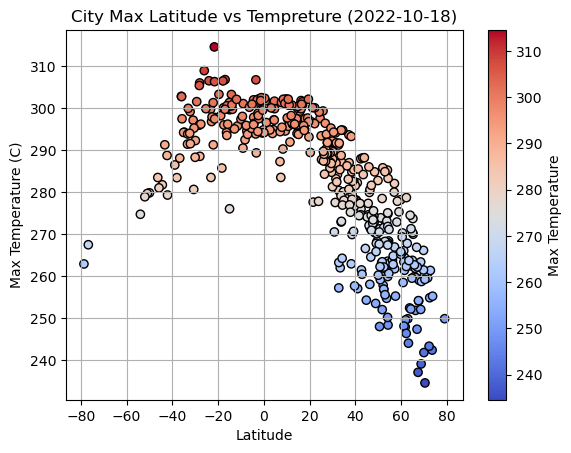

In [19]:
latitude = city_data_df['Lat']
temperature =city_data_df['Max Temp']


# Set the color based on temperature
plt.scatter(latitude, temperature, c=temperature, cmap='coolwarm', edgecolors='black')

# Add grid lines
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs Tempreture (2022-10-18)")

# Add a colorbar to show temperature scale
cbar = plt.colorbar()
cbar.set_label('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

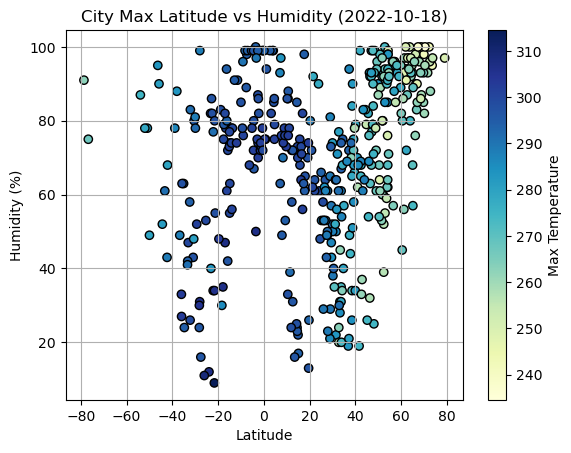

In [20]:
latitude = city_data_df['Lat']
humidity = city_data_df['Humidity']
temperature = city_data_df['Max Temp']

# Set the color based on temperature
plt.scatter(latitude, humidity, c=temperature, cmap='YlGnBu', edgecolors='black')

# Add grid lines
plt.grid(True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Max Latitude vs Humidity (2022-10-18)")

# Add a colorbar to show temperature scale
cbar = plt.colorbar()
cbar.set_label('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

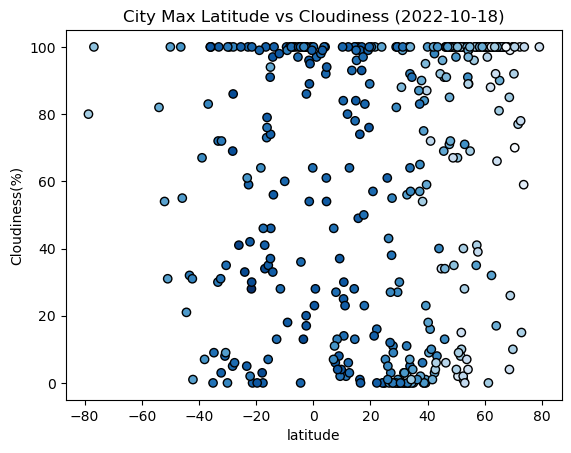

In [22]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df['Lat']
cloudiness =city_data_df['Cloudiness']
#plt.scatter(latitude,cloudiness)
plt.scatter(latitude,cloudiness, c=temperature, cmap='Blues', edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Max Latitude vs Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

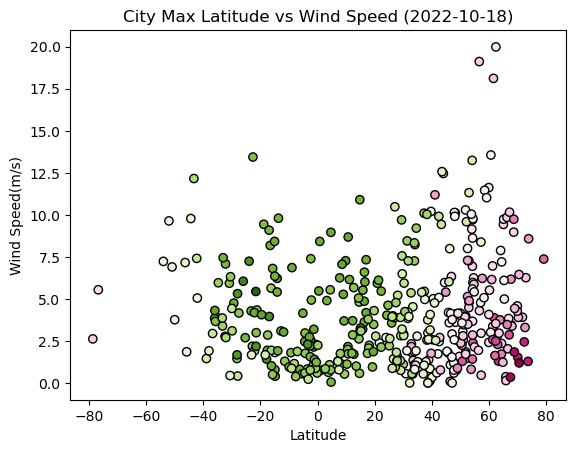

In [23]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df['Lat']
windSpeed =city_data_df['Wind Speed']
#plt.scatter(latitude,windSpeed)
plt.scatter(latitude,windSpeed, c=temperature, cmap='PiYG', edgecolors='black')
# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title("City Max Latitude vs Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,amnat charoen,15.8217,104.7667,299.22,68,100,5.52,TH,1700705675
2,mehran,33.2700,46.3847,280.06,31,100,0.53,IR,1700705682
3,bosobolo,4.1392,19.9461,294.83,99,100,1.08,CD,1700705694
4,seka,18.0471,103.8551,297.42,65,83,2.24,TH,1700705695
5,ierapetra,33.8486,26.4797,294.67,67,5,7.26,GR,1700705719


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-76.7561,171.7199,267.44,75,100,5.54,AQ,1700705673
8,jamestown,-16.3061,-5.9424,294.15,94,73,5.64,SH,1700705736
16,gurupa,-1.4056,-51.8443,299.53,73,54,2.14,BR,1700705787
18,mareeba,-16.9282,141.9196,306.73,47,34,3.95,AU,1700705803
22,aracoiaba,-4.4262,-38.8893,297.77,80,0,2.97,BR,1700705819


###  Temperature vs. Latitude Linear Regression Plot

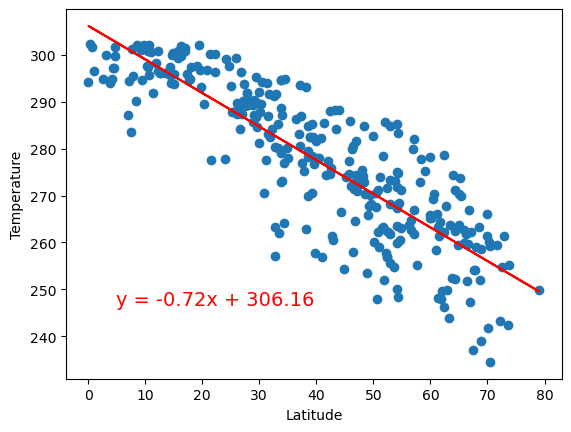

In [108]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
# Plotting
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")

# Add the line equation to the bottom left of the graph
plt.text(0.1, 0.20, line_eq, transform=plt.gca().transAxes, fontsize=14, color='red')

# Labeling and displaying the plot
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

In [51]:
# # Linear regression on Northern Hemisphere
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Max Temp']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# # r square estimation
# r_squared_value =(x_values, y_values)

# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Latitude')
# plt.ylabel('Tempreture')

# plt.show()

In [68]:
rvalue, _ = pearsonr(x_values, y_values)

print(f'The r-value is: {(rvalue)}')

The r-value is: -0.853428773611898


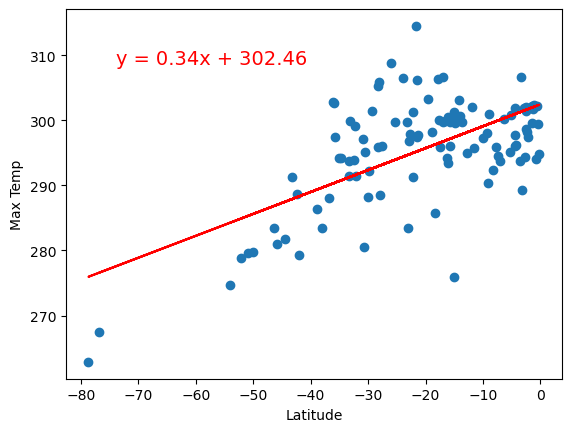

In [109]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Add the line equation to the bottom left of the graph
plt.text(0.1, 0.85, line_eq, transform=plt.gca().transAxes, fontsize=14, color='red')

plt.annotate(line_eq,(5.8,0.8),fontsize=10,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

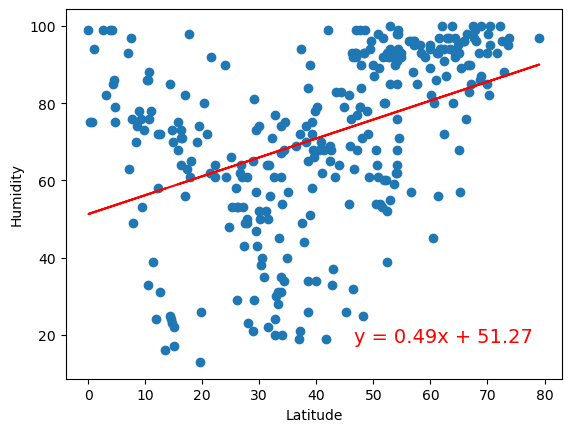

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
# Add the line equation to the bottom left of the graph
plt.text(0.58, 0.10, line_eq, transform=plt.gca().transAxes, fontsize=14, color='red')

plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

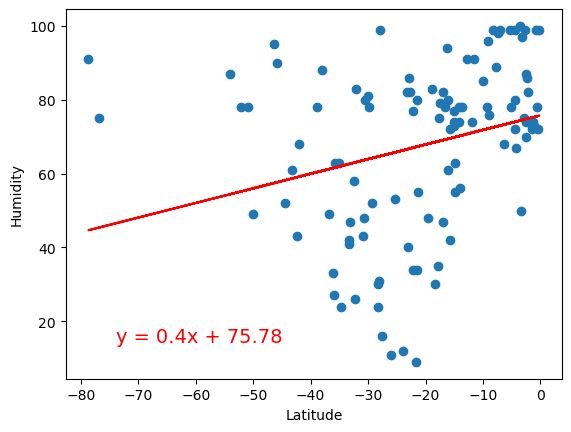

In [98]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.text(0.10, 0.10, line_eq, transform=plt.gca().transAxes, fontsize=14, color='red')
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

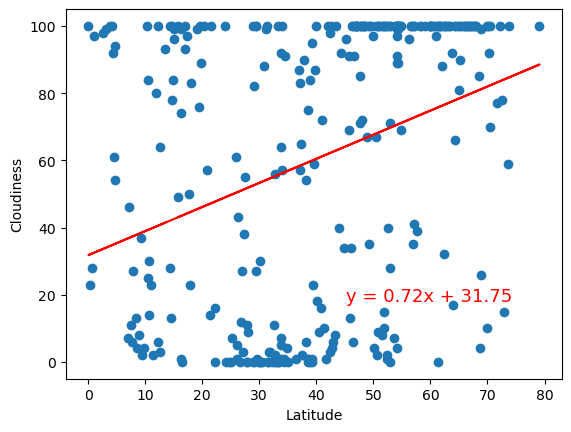

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45.20,18.20),fontsize=13,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

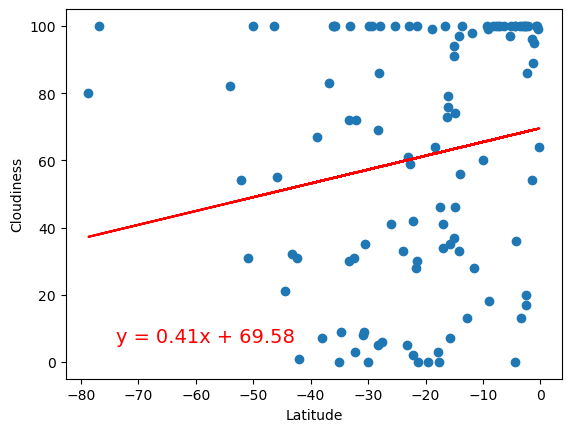

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.text(0.10, 0.10, line_eq, transform=plt.gca().transAxes, fontsize=14, color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

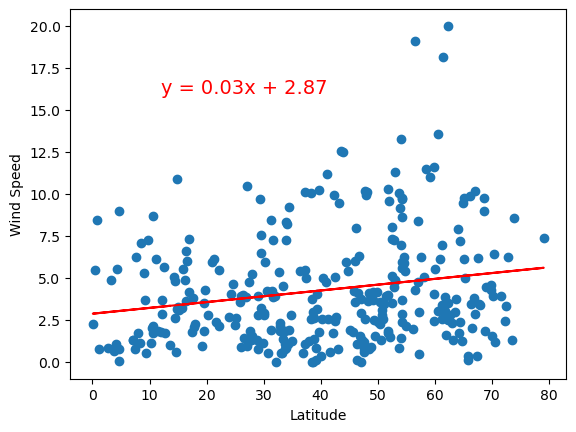

In [126]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(12.00,16.0),fontsize=14,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

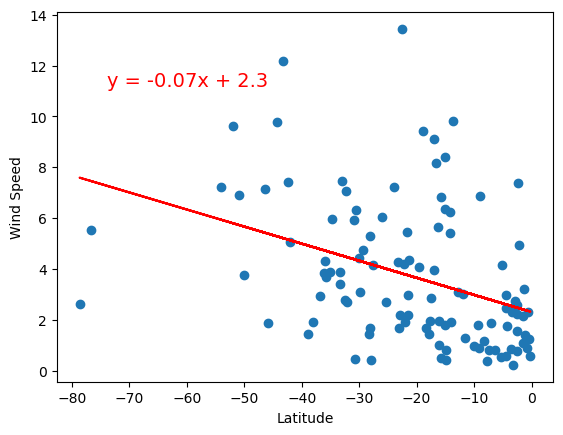

In [136]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.text(0.10, 0.80, line_eq, transform=plt.gca().transAxes, fontsize=14, color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
# Linear regression on Northern Hemisphere

1 As we move towards higher latitudes, the max temperature tends to decrease
2 As we move towards higher latitudes, the humidity tends to increase.
3 As latitude increases, cloudiness tends to increase.
4 As latitude increases, wind speed tends to increase.

# Linear regression on Southern Hemisphere

1 As we move towards higher latitudes, the temperature tends to increase
2 As we move towards higher latitudes, the humidity tends to gradually increase.
3 As latitude increases, cloudiness tends to increase
4 As latitude increases, wind speed tends to decrease.